In [212]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [213]:
model_to_save = '../../models/gmm/gmm_model.pkl'
movies_matrix_to_save = '../../models/gmm/cluster_movie_matrix.pkl'
scaler_to_save = '../../models/gmm/scaler.pkl'

In [214]:
df = pd.read_csv('../../data/processed/dataset.csv')

In [215]:
df.head()

,movie id,rate,age,gender,occupation,Other,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,242,-0.729352,0.154334,1,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997
1,302,-0.729352,0.154334,0,6,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1997
2,51,-1.779641,0.154334,1,19,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,1994
3,474,0.320937,0.154334,1,6,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1963
4,265,-1.779641,0.154334,1,4,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1990


In [216]:
df.columns

Index(['movie id', 'rate', 'age', 'gender', 'occupation', 'Other', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western',
       'release_year'],
      dtype='object')

In [217]:
df = df.rename(columns={'Children\'s': 'Children'})

In [218]:
X = df.drop(columns=['movie id', 'rate', 'release_year'])

In [219]:
X.head(2)

,age,gender,occupation,Other,Action,Adventure,Animation,Children,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.154334,1,20,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.154334,0,6,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0


In [220]:
model_gmm = GaussianMixture(n_components=5, random_state=42)

In [221]:
model_gmm.fit(X)

GaussianMixture(n_components=5, random_state=42)

In [222]:
clusters = model_gmm.predict(X)

In [223]:
cluster_probs = model_gmm.predict_proba(X)

In [224]:
cluster_probs.shape

(93206, 5)

In [225]:
for i in cluster_probs[:5]:
    print(i)

[1.03492401e-13 1.00000000e+00 0.00000000e+00 3.17691634e-17
 2.61943135e-25]
[0.00000000e+000 0.00000000e+000 1.55840437e-200 1.00000000e+000
 0.00000000e+000]
[1. 0. 0. 0. 0.]
[1.00000000e+000 0.00000000e+000 3.06559504e-107 3.19426002e-047
 9.32869659e-019]
[1.00000000e+00 0.00000000e+00 0.00000000e+00 6.75558021e-17
 1.24289874e-15]


In [226]:
from matplotlib import pyplot as plt
import seaborn as sns

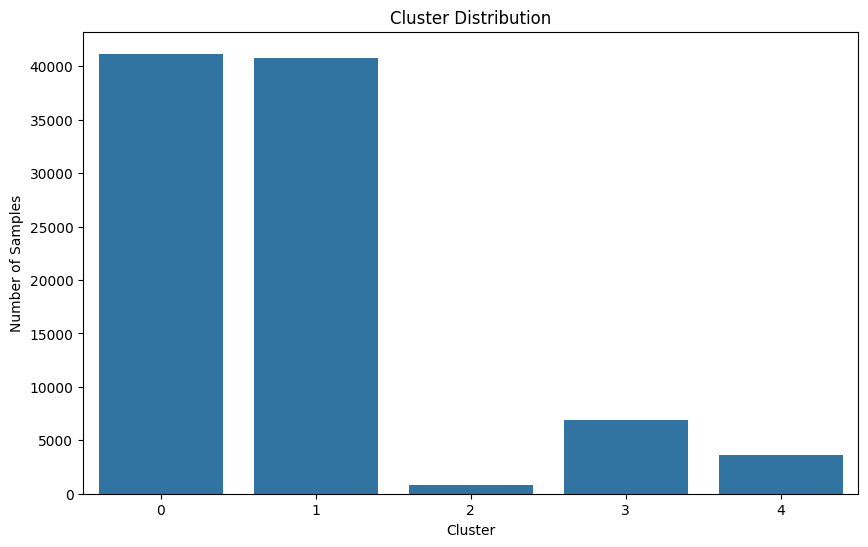

In [227]:
plt.figure(figsize=(10, 6))
sns.countplot(x=clusters)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Samples')
plt.show()

In [228]:
# accuracy
silhouette_avg = silhouette_score(X, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: -0.025690345006689576


In [229]:
df.columns

Index(['movie id', 'rate', 'age', 'gender', 'occupation', 'Other', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'release_year'],
      dtype='object')

In [230]:
df.head(1)

,movie id,rate,age,gender,occupation,Other,Action,Adventure,Animation,Children,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,242,-0.729352,0.154334,1,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1997


In [231]:
df2 = df.copy()
df2['cluster'] = clusters

In [232]:
df2.head()

,movie id,rate,age,gender,occupation,Other,Action,Adventure,Animation,Children,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year,cluster
0,242,-0.729352,0.154334,1,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1997,1
1,302,-0.729352,0.154334,0,6,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1997,3
2,51,-1.779641,0.154334,1,19,0,0,0,0,0,...,0,0,0,1,0,0,1,1,1994,0
3,474,0.320937,0.154334,1,6,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1963,0
4,265,-1.779641,0.154334,1,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1990,0


In [233]:
df2.value_counts('cluster')

cluster
0    41178
1    40765
3     6861
4     3597
2      805
Name: count, dtype: int64

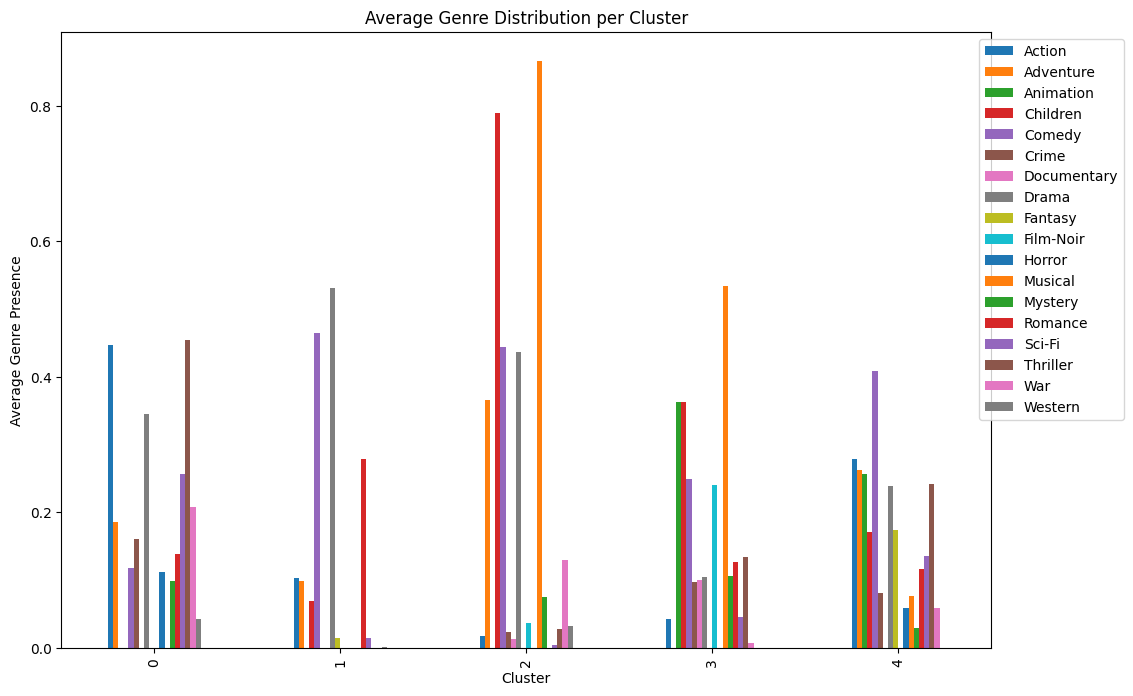

In [234]:
cluster_genre = df2.groupby('cluster')[['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
                                        'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
                                        'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].mean()
cluster_genre.plot(kind='bar', figsize=(12, 8))
plt.title('Average Genre Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Genre Presence')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [235]:
cluster_movies_ratings = df2.groupby(['cluster', 'movie id'])['rate'].mean().reset_index()
cluster_movies_ratings.head()

,cluster,movie id,rate
0,0,2,-0.341010
1,0,3,-0.439140
2,0,5,-0.303918
3,0,7,0.169673
4,0,10,0.208406


In [236]:
cluster_movies_ratings['cluster'].value_counts()

cluster
1    941
4    751
0    501
3    130
2     41
Name: count, dtype: int64

In [237]:
top_movies_per_cluster = {}
movie_count = 5

for cluster in df2['cluster'].unique():
    top_movies = cluster_movies_ratings[cluster_movies_ratings['cluster'] == cluster] \
        .sort_values(by='rate', ascending=False) \
        .head(movie_count)['movie id'].tolist()
    top_movies_per_cluster[cluster] = top_movies

for cluster, movies in top_movies_per_cluster.items():
    print(f'Cluster {cluster}: Top Movies IDs: {movies}')

Cluster 1: Top Movies IDs: [1617, 1653, 247, 1306, 1358]
Cluster 3: Top Movies IDs: [814, 1201, 119, 1594, 320]
Cluster 0: Top Movies IDs: [1472, 1491, 1122, 853, 318]
Cluster 4: Top Movies IDs: [1540, 1462, 1283, 1134, 1136]
Cluster 2: Top Movies IDs: [177, 115, 1084, 484, 611]


#### Soft Clustering

In [238]:
cluster_movie_matrix = cluster_movies_ratings.pivot(index='movie id', columns='cluster', values='rate').fillna(0)
cluster_movie_matrix.head()

cluster,0,1,2,3,4
movie id,,,,,
1,0.000000,0.000000,0.0,0.252387,0.020855
2,-0.341010,0.000000,0.0,0.000000,-0.991924
3,-0.439140,0.000000,0.0,0.000000,0.671034
4,0.000000,-0.059525,0.0,0.000000,-0.379255
5,-0.303918,0.000000,0.0,0.000000,-0.029159


In [239]:
weighted_ratings = np.dot(cluster_probs, cluster_movie_matrix.T)

In [240]:
user_index = 7
top_movies_indices = np.argsort(weighted_ratings[user_index])[::-1][:10]
recommended_movie_ids = cluster_movie_matrix.index[top_movies_indices].tolist()
print(f'Recommended Movie IDs for User {user_index}: {recommended_movie_ids}')

Recommended Movie IDs for User 7: [1617, 1599, 1536, 1500, 1306, 247, 1467, 1653, 1358, 1293]


In [241]:
import joblib

joblib.dump(model_gmm, model_to_save)
joblib.dump(cluster_movie_matrix, movies_matrix_to_save)

['../../models/gmm/cluster_movie_matrix.pkl']

#### Predict Movies for a new user

In [243]:
# recommend movies for new user
new_user = pd.DataFrame({
    'age': [25],
    'gender': [1],
    'occupation': [10],
    'Other': [0],
    'Action': [1],
    'Adventure': [0],
    'Animation': [0],
    'Children': [0],
    'Comedy': [1],
    'Crime': [0],
    'Documentary': [0],
    'Drama': [0],
    'Fantasy': [0],
    'Film-Noir': [0],
    'Horror': [0],
    'Musical': [0],
    'Mystery': [0],
    'Romance': [1],
    'Sci-Fi': [0],
    'Thriller': [0],
    'War': [0],
    'Western': [0],
})
movies_count = 5

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_user_scaled = scaler.fit_transform(new_user)

new_user_probs= model_gmm.predict_proba(new_user_scaled)

top_movies_indices_new_user = np.dot(new_user_probs, cluster_movie_matrix.T)

top_indecies = np.argsort(top_movies_indices_new_user[0])[::-1][:movies_count]
recommended_movie_ids_new_user = cluster_movie_matrix.index[top_indecies].tolist()

print(f'Recommended Movie IDs for New User: {recommended_movie_ids_new_user}')

Recommended Movie IDs for New User: [1136, 1137, 1283, 513, 514]


c:\Users\nad soft\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


In [244]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_avg = silhouette_score(X, clusters)
calinski_harabasz = calinski_harabasz_score(X, clusters)
davies_bouldin = davies_bouldin_score(X, clusters)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(f'Davies-Bouldin Score: {davies_bouldin}')

Silhouette Score: -0.025690345006689576
Calinski-Harabasz Index: 736.2585229101489
Davies-Bouldin Score: 10.548307818965249


### Hyperparameter Tuning

##### Manual Tuning

In [245]:
# manual hyperparameter tuning
best_silhouette = -1
best_n = None

#### Predict Movies for a new user
for n in range(2, 20):
    _model_gmm = GaussianMixture(n_components=n, random_state=42)
    _model_gmm.fit(X)
    _clusters = _model_gmm.predict(X)
    _silhouette_avg = silhouette_score(X, _clusters)
    print(f'Number of Components: {n}, Silhouette Score: {_silhouette_avg}')
    if _silhouette_avg > best_silhouette:
        best_silhouette = _silhouette_avg
        best_n = n
print(f'Best Number of Components: {best_n}, Best Silhouette Score: {best_silhouette}')

Number of Components: 2, Silhouette Score: 0.062112296646504916
Number of Components: 3, Silhouette Score: -0.011686828762647499
Number of Components: 4, Silhouette Score: -0.023968274505239966
Number of Components: 5, Silhouette Score: -0.025690345006689576
Number of Components: 6, Silhouette Score: -0.018033447456485958
Number of Components: 7, Silhouette Score: -0.034555072706476966
Number of Components: 8, Silhouette Score: -0.037405975083716805
Number of Components: 9, Silhouette Score: -0.028948040032480044
Number of Components: 10, Silhouette Score: -0.035566695985451084
Number of Components: 11, Silhouette Score: -0.4466949735688323
Number of Components: 12, Silhouette Score: -0.05696260367012691
Number of Components: 13, Silhouette Score: -0.2669567857127155
Number of Components: 14, Silhouette Score: -0.2554581117328037
Number of Components: 15, Silhouette Score: -0.22225501029953248
Number of Components: 16, Silhouette Score: -0.2286372485207689
Number of Components: 17, Sil

In [246]:
best_calinski = -1
best_n_calinski = None

for n in range(2, 20):
    _model_gmm = GaussianMixture(n_components=n, random_state=42)
    _model_gmm.fit(X)
    _clusters = _model_gmm.predict(X)
    _calinski_harabasz = calinski_harabasz_score(X, _clusters)
    print(f'Number of Components: {n}, Calinski-Harabasz Index: {_calinski_harabasz}')
    if _calinski_harabasz > best_calinski:
        best_calinski = _calinski_harabasz
        best_n_calinski = n
print(f'Best Number of Components: {best_n_calinski}, Best Calinski-Harabasz Index: {best_calinski}')

Number of Components: 2, Calinski-Harabasz Index: 1141.2804910880743
Number of Components: 3, Calinski-Harabasz Index: 1287.9191963061212
Number of Components: 4, Calinski-Harabasz Index: 758.3564347226435
Number of Components: 5, Calinski-Harabasz Index: 736.2585229101489
Number of Components: 6, Calinski-Harabasz Index: 754.1815024853723
Number of Components: 7, Calinski-Harabasz Index: 706.4358356684572
Number of Components: 8, Calinski-Harabasz Index: 649.7134307359854
Number of Components: 9, Calinski-Harabasz Index: 591.6154708506064
Number of Components: 10, Calinski-Harabasz Index: 526.6343314282925
Number of Components: 11, Calinski-Harabasz Index: 581.4397138575564
Number of Components: 12, Calinski-Harabasz Index: 483.50573829679394
Number of Components: 13, Calinski-Harabasz Index: 569.6463937474869
Number of Components: 14, Calinski-Harabasz Index: 434.2222665024446
Number of Components: 15, Calinski-Harabasz Index: 807.0274874994592
Number of Components: 16, Calinski-Hara

In [247]:
best_davies = float('inf')
best_n_davies = None

for n in range(2, 20):
    _model_gmm = GaussianMixture(n_components=n, random_state=42)
    _model_gmm.fit(X)
    _clusters = _model_gmm.predict(X)
    _davies_bouldin = davies_bouldin_score(X, _clusters)
    print(f'Number of Components: {n}, Davies-Bouldin Score: {_davies_bouldin}')
    if _davies_bouldin < best_davies:
        best_davies = _davies_bouldin
        best_n_davies = n
print(f'Best Number of Components: {best_n_davies}, Best Davies-Bouldin Score: {best_davies}')

Number of Components: 2, Davies-Bouldin Score: 5.110268024068671
Number of Components: 3, Davies-Bouldin Score: 11.550580455618515
Number of Components: 4, Davies-Bouldin Score: 12.05547361271519
Number of Components: 5, Davies-Bouldin Score: 10.548307818965249
Number of Components: 6, Davies-Bouldin Score: 12.03647078342304
Number of Components: 7, Davies-Bouldin Score: 11.39941508545226
Number of Components: 8, Davies-Bouldin Score: 11.481185716177004
Number of Components: 9, Davies-Bouldin Score: 12.431696620477938
Number of Components: 10, Davies-Bouldin Score: 11.222723246222637
Number of Components: 11, Davies-Bouldin Score: 8.676382894064197
Number of Components: 12, Davies-Bouldin Score: 11.373805907408629
Number of Components: 13, Davies-Bouldin Score: 9.5882425981472
Number of Components: 14, Davies-Bouldin Score: 10.482875357215253
Number of Components: 15, Davies-Bouldin Score: 9.581115595618536
Number of Components: 16, Davies-Bouldin Score: 10.75809748842069
Number of Com

In [248]:
# cluster with 2 components
tuned_n_components = 2
model_gmm2 = GaussianMixture(n_components=tuned_n_components, random_state=42)
model_gmm2.fit(X)
tuned_clusters2 = model_gmm2.predict(X)
cluster_movie_matrix2 = cluster_movies_ratings.pivot(index='movie id', columns='cluster', values='rate').fillna(0)

print(f'Tuned Number of Components: {tuned_n_components}')

Tuned Number of Components: 2


In [249]:
tuned_n_components = 3
model_gmm = GaussianMixture(n_components=tuned_n_components, random_state=42)
model_gmm.fit(X)
tuned_clusters = model_gmm.predict(X)


df3 = df.copy()
df3['cluster'] = tuned_clusters
cluster_movies_ratings = df3.groupby(['cluster', 'movie id'])['rate'].mean().reset_index()

cluster_movie_matrix = cluster_movies_ratings.pivot(index='movie id', columns='cluster', values='rate').fillna(0)

print(f'Tuned Number of Components: {tuned_n_components}')
print(cluster_movie_matrix.shape)

print("[+] Saved model", joblib.dump(model_gmm, model_to_save))
print("[+] Saved matrix", joblib.dump(cluster_movie_matrix, movies_matrix_to_save))
print("[+] Saved scaler", joblib.dump(scaler, scaler_to_save))

Tuned Number of Components: 3
(1611, 3)
[+] Saved model ['../../models/gmm/gmm_model.pkl']
[+] Saved matrix ['../../models/gmm/cluster_movie_matrix.pkl']
[+] Saved scaler ['../../models/gmm/scaler.pkl']


In [250]:
print("Cluster distribution before and after tuning:")
print(pd.Series(tuned_clusters2).value_counts())
print("clusters after tuning")
print(pd.Series(tuned_clusters).value_counts())

Cluster distribution before and after tuning:
1    83517
0     9689
Name: count, dtype: int64
clusters after tuning
2    65173
1    24207
0     3826
Name: count, dtype: int64


In [256]:
# Example: show top 3 movies per cluster
top_n = 3

print("Top movies per cluster (2 clusters):")
for c in range(2):
    top_movies = cluster_movie_matrix.iloc[c].sort_values(ascending=False).head(top_n)
    print(f"Cluster {c}: {top_movies.index.tolist()}")

print("\nTop movies per cluster (3 clusters):")
for c in range(3):
    top_movies = cluster_movie_matrix.iloc[c].sort_values(ascending=False).head(top_n)
    print(f"Cluster {c}: {top_movies.index.tolist()}")


Top movies per cluster (2 clusters):
Cluster 0: [2, 0, 1]
Cluster 1: [1, 2, 0]

Top movies per cluster (3 clusters):
Cluster 0: [2, 0, 1]
Cluster 1: [1, 2, 0]
Cluster 2: [0, 1, 2]


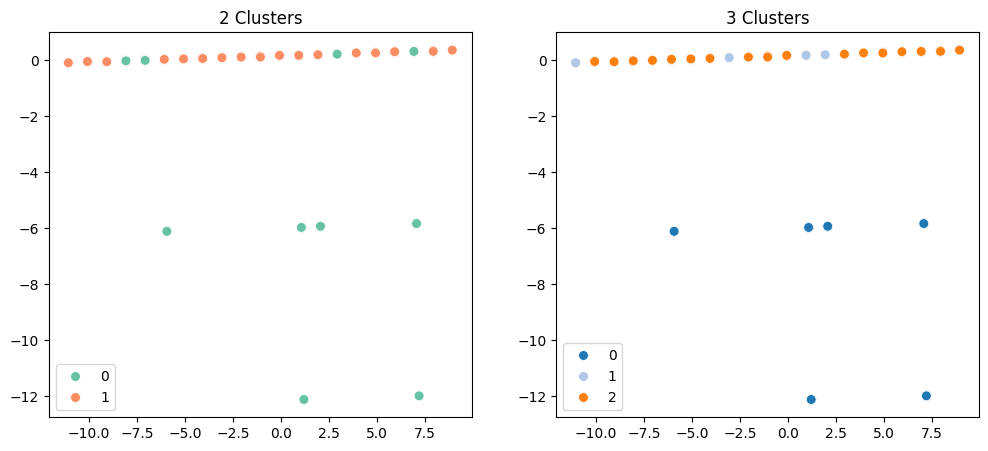

In [257]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=tuned_clusters2, palette="Set2", s=50)
plt.title("2 Clusters")

plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=tuned_clusters, palette="tab20", s=50)
plt.title("3 Clusters")

plt.show()

In [258]:
print(cluster_movie_matrix.shape)

(1611, 3)


In [260]:
# recommend movies for new user
new_user = pd.DataFrame({
    'age': [25],
    'gender': [1],
    'occupation': [10],
    'Other': [0],
    'Action': [1],
    'Adventure': [0],
    'Animation': [0],
    'Children': [0],
    'Comedy': [1],
    'Crime': [0],
    'Documentary': [0],
    'Drama': [0],
    'Fantasy': [0],
    'Film-Noir': [0],
    'Horror': [0],
    'Musical': [0],
    'Mystery': [0],
    'Romance': [1],
    'Sci-Fi': [0],
    'Thriller': [0],
    'War': [0],
    'Western': [0],
})
movies_count = 5

new_user_scaled = scaler.transform(new_user)

new_user_probs= model_gmm.predict_proba(new_user_scaled)
# new_user_probs: (1, n_clusters)
# cluster_movie_matrix: (n_clusters, n_movies)

top_movies_indices_new_user = np.dot(new_user_probs, cluster_movie_matrix.values.T)
top_indices = np.argsort(top_movies_indices_new_user[0])[::-1][:movies_count]
recommended_movie_ids_new_user = cluster_movie_matrix.index[top_indices].tolist()

print(f"Recommended Movie IDs for New User: {recommended_movie_ids_new_user}")

Recommended Movie IDs for New User: [483, 513, 514, 474, 480]


c:\Users\nad soft\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
